In [91]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing , model_selection , linear_model , neighbors , tree , ensemble , svm , metrics
import seaborn as sns

In [4]:
#read dataset csv file
dataset=pd.read_csv('/content/diabetes.csv')
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
#dataset description
dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [6]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

***Preprocessing stage ***

In [7]:
#replace gender with 0s and 1s
dataset.Gender.replace({'Female':1,'Male':0},inplace=True)
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,0,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,0,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,0,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,1,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,1,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,1,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [8]:
#replace all yes and no with 1s and 0s
for i in dataset.columns:
  dataset[i].replace({'Yes':1,'No':0},inplace=True)
dataset


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


In [9]:
#replace class with 0 and 1
dataset['class'].replace({'Positive':1,'Negative':0},inplace=True)
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

***1.Applying Logistic Regression***

In [33]:
#split dataset to data and target
x = dataset.drop('class', axis=1)
y = dataset['class']
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [52]:
#normalization for data
x_normalize=preprocessing.StandardScaler()
x_norm=x_normalize.fit_transform(x)

In [65]:
#split to train and test
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.2,stratify=y,random_state=42)

In [66]:
#apply logistic regression
logistic=linear_model.LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [115]:
y_pred=logistic.predict(x_test)
accuracy_logistic=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of logisic regression = ',accuracy_logistic)

Accuracy of logisic regression =  0.9423076923076923


TP =  39
FN =  25
FP =  25
TN =  15


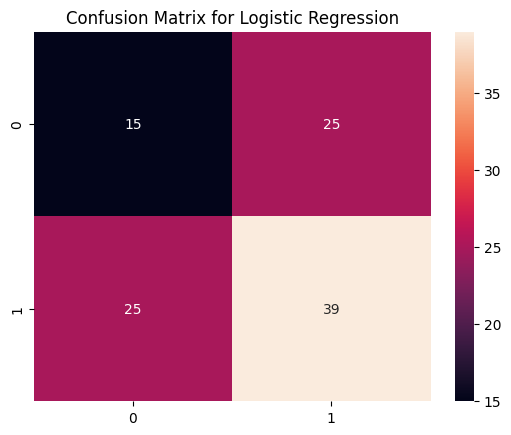

In [139]:
#plot confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for Logistic Regression")
print('TP = ',cm[1,1])
print('FN = ',cm[1,0])
print('FP = ',cm[0,1])
print('TN = ',cm[0,0])

***Apply K-nearst neighbor***

In [144]:
#applying KNN
knn=neighbors.KNeighborsClassifier(3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [145]:
y_pred_knn=knn.predict(x_test)
accuracy_knn=metrics.accuracy_score(y_test,y_pred_knn)
print('Accuracy of KNN = ',accuracy_knn)

Accuracy of KNN =  0.9423076923076923


TP =  59
FN =  5
FP =  1
TN =  39


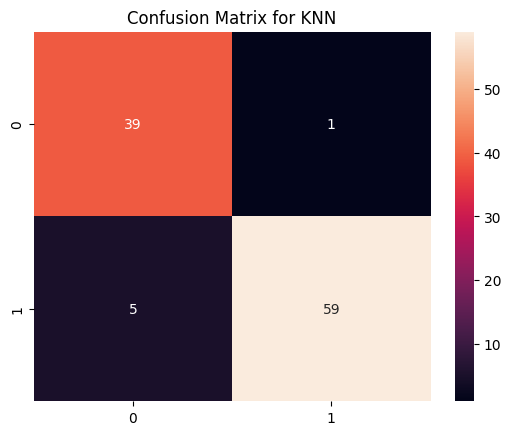

In [147]:
#plot confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred_knn)
ax=sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for KNN")
print('TP = ',cm[1,1])
print('FN = ',cm[1,0])
print('FP = ',cm[0,1])
print('TN = ',cm[0,0])

***Apply Decision tree ***

In [153]:
#apply Decision tree
t=tree.DecisionTreeClassifier()
t.fit(x_train,y_train)

DecisionTreeClassifier()

In [154]:
y_pred_tree=t.predict(x_test)
accyracy_tree=metrics.accuracy_score(y_test,y_pred_tree)
print('Accuracy of Decision tree = ',accyracy_tree)

Accuracy of Decision tree =  0.9807692307692307


[Text(0.7049418604651163, 0.9444444444444444, 'x[2] <= 0.008\ngini = 0.473\nsamples = 416\nvalue = [160, 256]'),
 Text(0.502906976744186, 0.8333333333333334, 'x[1] <= 0.271\ngini = 0.424\nsamples = 210\nvalue = [146, 64]'),
 Text(0.31976744186046513, 0.7222222222222222, 'x[3] <= 0.104\ngini = 0.283\nsamples = 158\nvalue = [131, 27]'),
 Text(0.19767441860465115, 0.6111111111111112, 'x[10] <= 0.601\ngini = 0.15\nsamples = 135\nvalue = [124, 11]'),
 Text(0.09302325581395349, 0.5, 'x[11] <= 0.081\ngini = 0.081\nsamples = 119\nvalue = [114, 5]'),
 Text(0.046511627906976744, 0.3888888888888889, 'x[0] <= 1.233\ngini = 0.028\nsamples = 71\nvalue = [70, 1]'),
 Text(0.023255813953488372, 0.2777777777777778, 'gini = 0.0\nsamples = 69\nvalue = [69, 0]'),
 Text(0.06976744186046512, 0.2777777777777778, 'x[13] <= 0.258\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.046511627906976744, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09302325581395349, 0.16666666666666666,

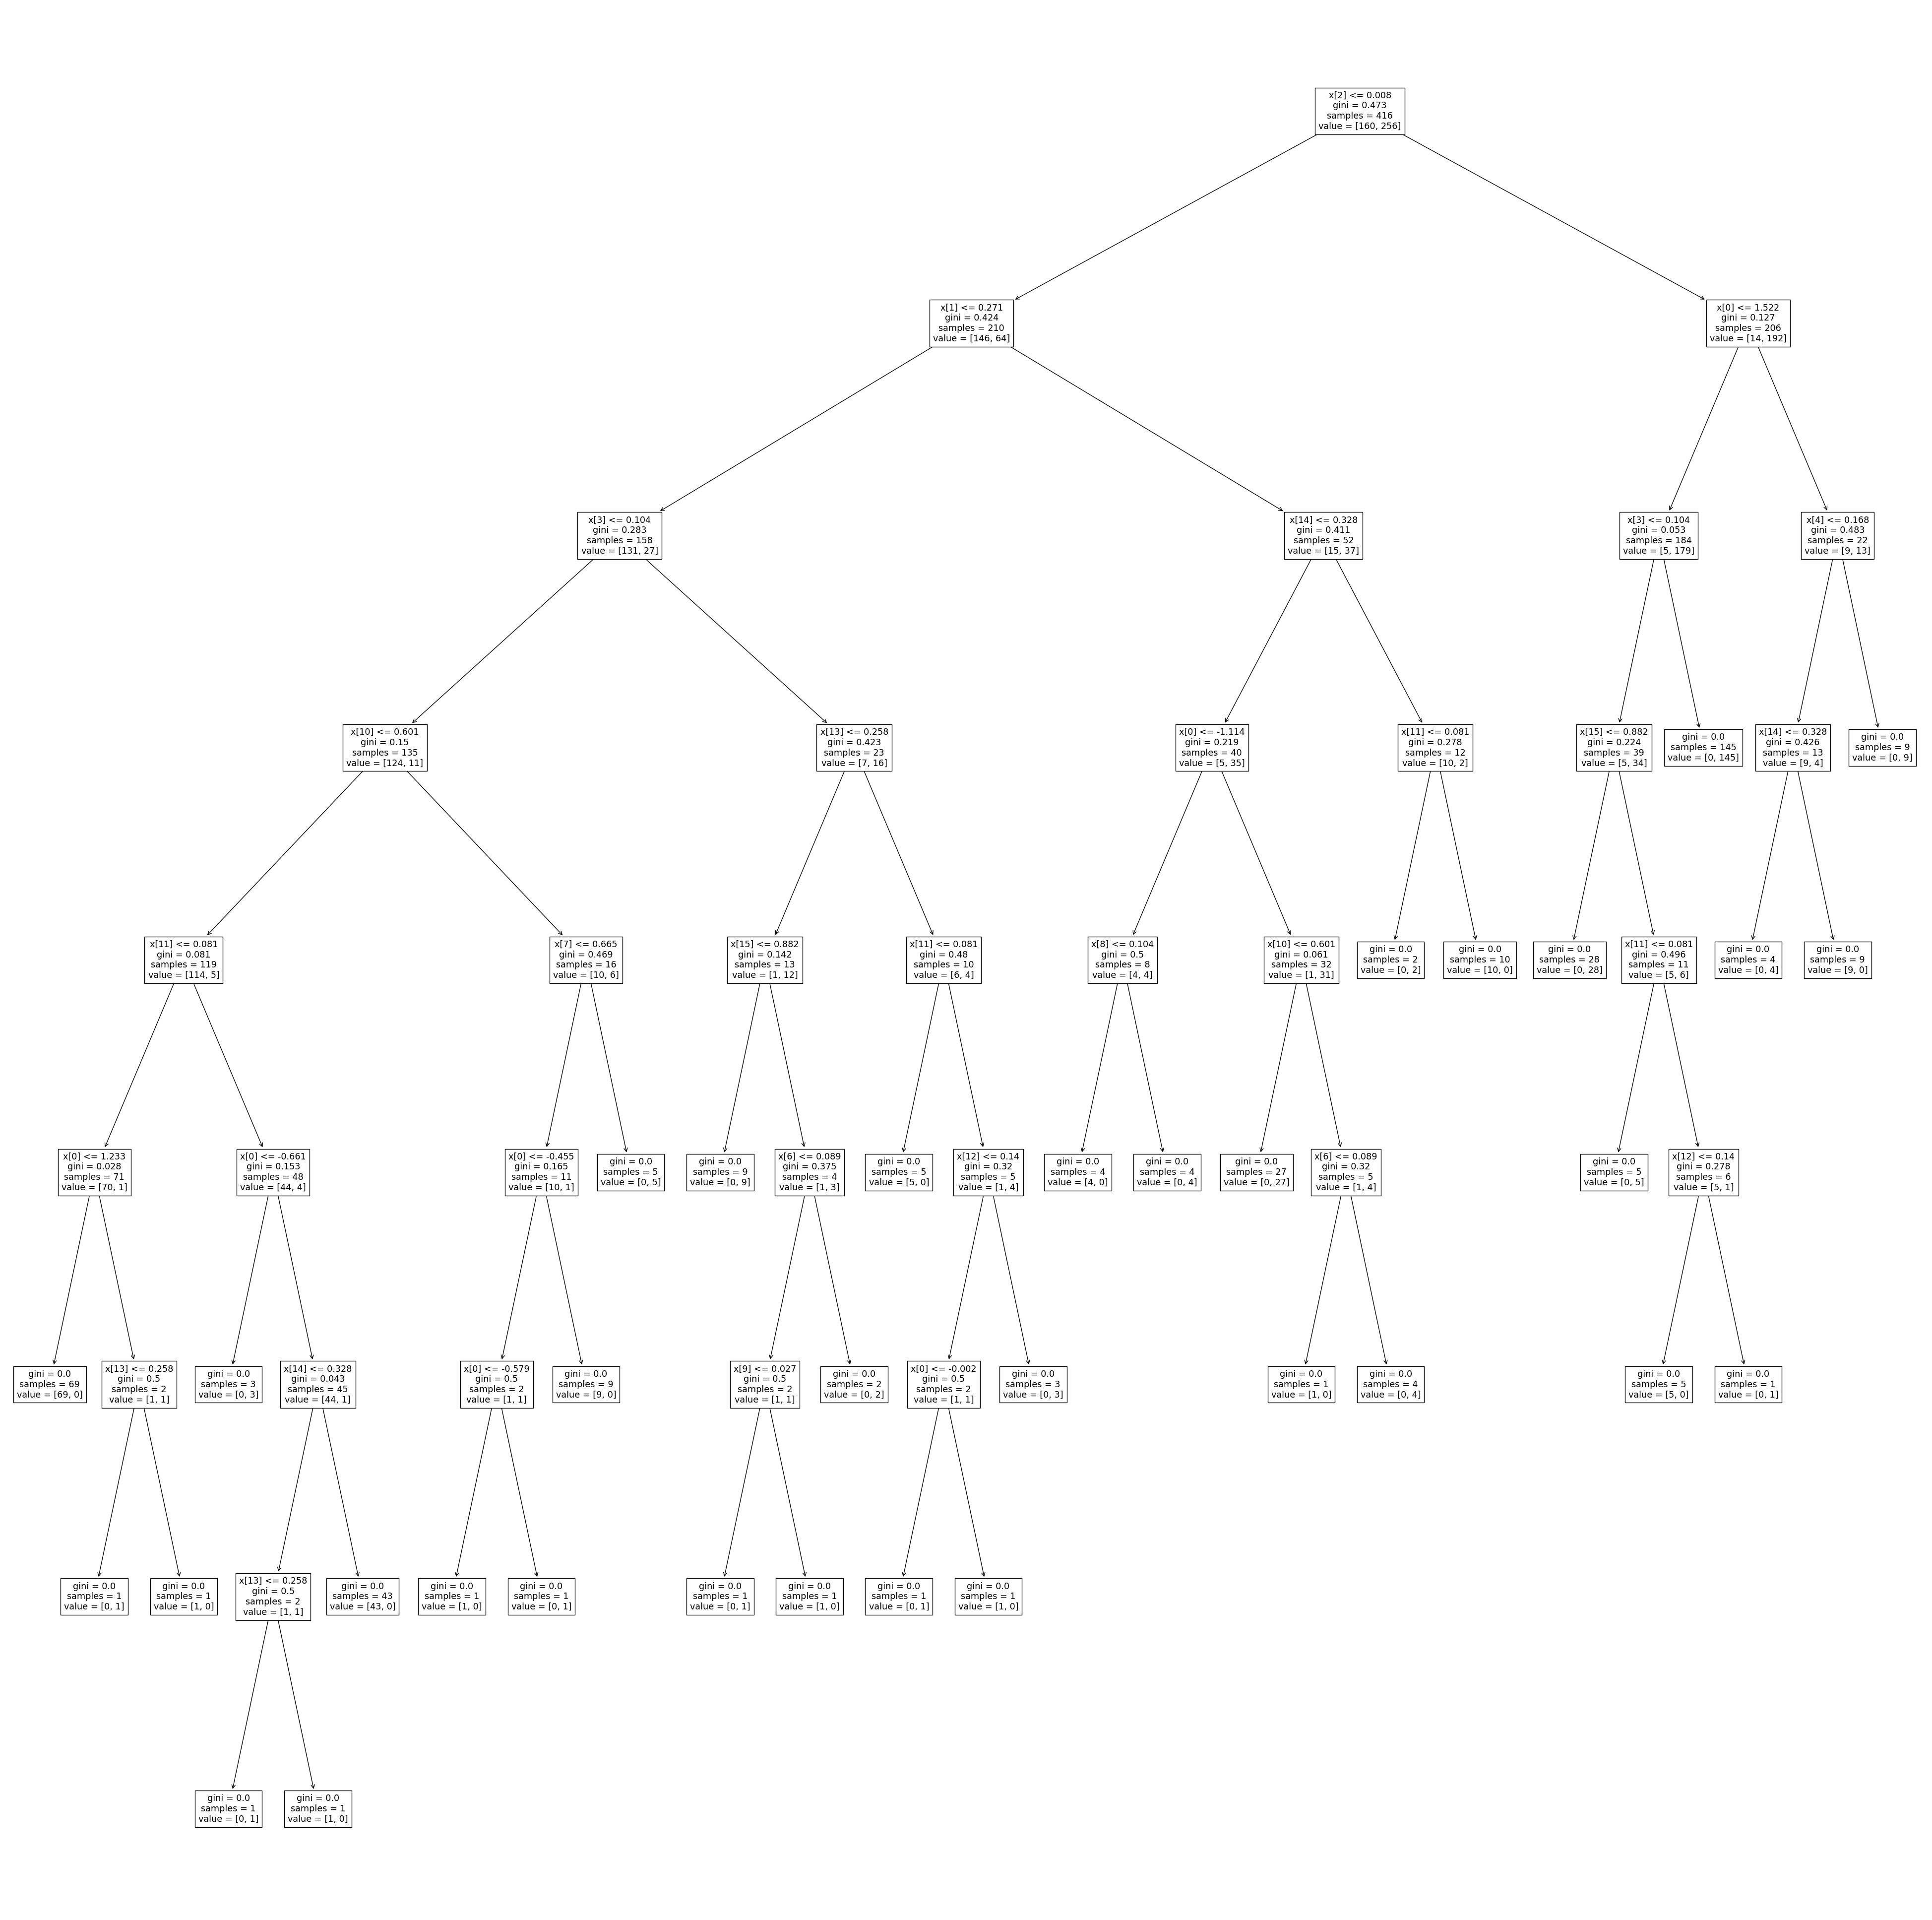

In [155]:
#plot decision tree
plt.figure(figsize=(50,50))
tree.plot_tree(t)

TP =  62
FN =  2
FP =  0
TN =  40


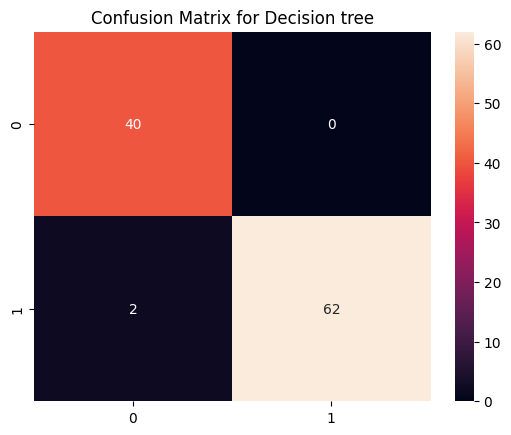

In [157]:
#plot confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred_tree)
ax=sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for Decision tree")
print('TP = ',cm[1,1])
print('FN = ',cm[1,0])
print('FP = ',cm[0,1])
print('TN = ',cm[0,0])

***Apply Random forest***

In [122]:
#apply random forest
forest=ensemble.RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier()

In [158]:
y_pred_forest=forest.predict(x_test)
accuracy_forest=metrics.accuracy_score(y_test,y_pred_forest)
print('Accuracy of random forest = ',accuracy_forest)

Accuracy of random forest =  0.9903846153846154


TP =  63
FN =  1
FP =  0
TN =  40


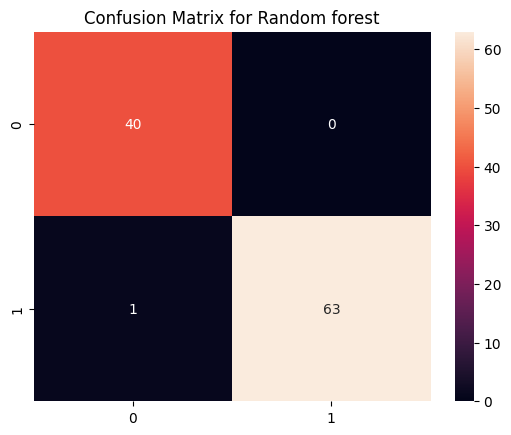

In [159]:
#plot confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred_forest)
ax=sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for Random forest")
print('TP = ',cm[1,1])
print('FN = ',cm[1,0])
print('FP = ',cm[0,1])
print('TN = ',cm[0,0])

***Apply SVM***

In [126]:
#normlization for SVM
x_mean=x.mean()
x_std=x.std()
x_normalize_svm=(x-x_mean)/x_std

In [130]:
#split to train & test
x_train_svm,x_test_svm,y_train_svm,y_test_svm=model_selection.train_test_split(x_normalize_svm,y,test_size=0.2,stratify=y)

In [163]:
#apply SVC
svc=svm.SVC(gamma='scale',kernel='poly')
svc.fit(x_train_svm,y_train_svm)

SVC(kernel='poly')

In [164]:
y_pred_svm=svc.predict(x_test_svm)
accuracy_svc=metrics.accuracy_score(y_test_svm,y_pred_svm)
print('Accuracy of SVM = ',accuracy_svc)

Accuracy of SVM =  0.9807692307692307


TP =  63
FN =  1
FP =  1
TN =  39


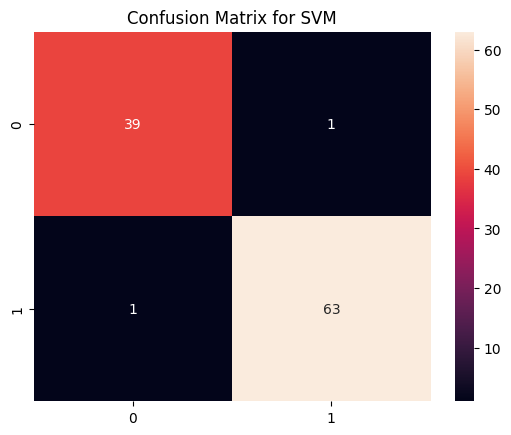

In [166]:
#plot confusion matrix
cm=metrics.confusion_matrix(y_test_svm,y_pred_svm)
ax=sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for SVM")
print('TP = ',cm[1,1])
print('FN = ',cm[1,0])
print('FP = ',cm[0,1])
print('TN = ',cm[0,0])

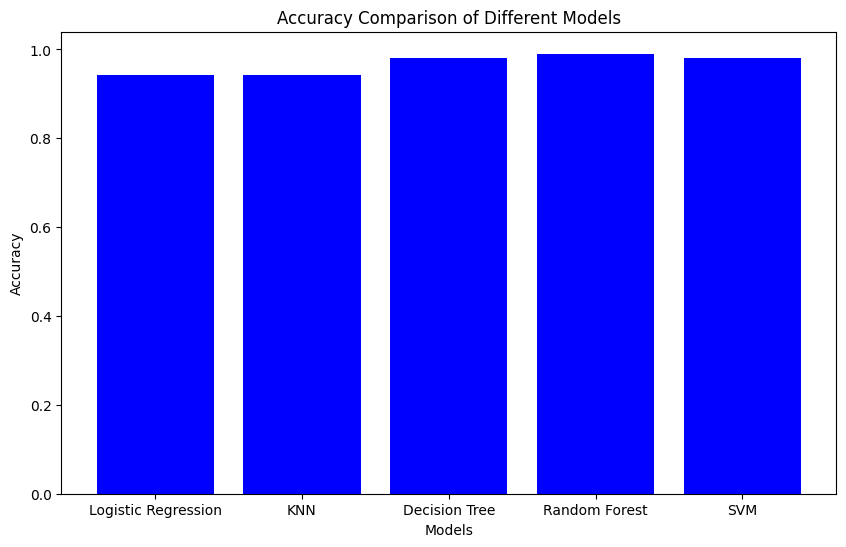

In [177]:
# bar plot for accuracy from models
models_accuracy = [accuracy_logistic, accuracy_knn, accyracy_tree, accuracy_forest, accuracy_svc]
labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']

plt.figure(figsize=(10, 6))
plt.bar(labels, models_accuracy, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()


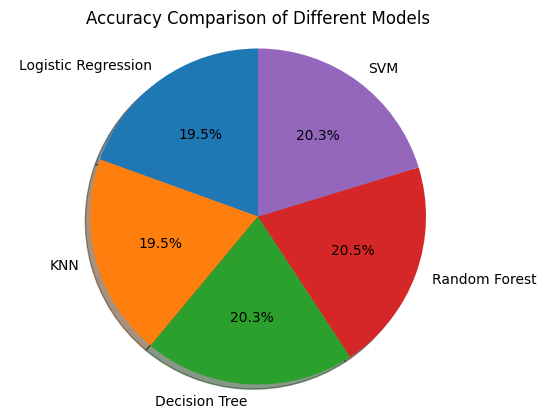

In [180]:
# Pie chart for accuracy of all models
labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
sizes = [accuracy_logistic, accuracy_knn, accyracy_tree, accuracy_forest, accuracy_svc]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Accuracy Comparison of Different Models')
plt.show()